In [1]:
# Import needed libraries to get data from URL and load into Pandas DF
import os
import tarfile
import urllib
import pandas as pd

# Define url and OS path that I want to save csv data under
DATA_URL = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/hcc-data-complete-balanced.csv"


DATA_PATH = os.path.join("/Users/Do-While/Desktop/SJSU/Classes/SJSU/Fall 2020", "DataSets")

# Function to get data from URL and return it as Pandas dataframe
def fetch_and_load_from_url(data_url, data_path, txt_file_name):
    
    # If no data path exists, create directory
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    # create text document path under OS path
    txt_path = os.path.join(data_path, txt_file_name)
    # Using URL, request data and return to created path
    urllib.request.urlretrieve(data_url, txt_path)
    # Read in text file, convert csv to pandas df and return upon close of file
    with open(txt_path, "r") as file:
        return pd.read_csv(file)

# Creating 1 dataframes
hcc_df = fetch_and_load_from_url(DATA_URL, DATA_PATH, "hcc_data.txt")
hcc_df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,"7,1","0,7",1,"3,5","0,5","52,5",37,856,1
1,0,0,0,0,0,0,1,1,0,1,...,120,7,"0,58",1,"1,8","0,85",32,10,18,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,"2,1",5,13,"0,1",28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,"8,1","1,11",2,"15,7","0,2",131,78,1316,0
4,1,1,1,1,0,1,0,1,0,1,...,109,"6,9","1,8",1,9,"0,1",59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0,0,0,0,0,0,1,1,0,0,...,117,7,"5,25",2,"8,8","1,35","73,3",46,873,0
200,0,1,1,0,0,0,0,1,0,0,...,231,"6,5","0,78",2,"7,6","1,04","69,3",23,70,0
201,1,1,1,0,0,0,0,1,0,0,...,304,7,"1,07",1,12,"1,57","71,2",29,106,0
202,1,1,1,0,0,0,0,1,0,0,...,197,"7,2","1,08",5,3,"0,63","94,4",83,859,0


## 1) Data clean up - feature engineering

In [2]:
# Noticed that the data has rows with commas where I assume a decimal point should be. Replace comma with decimal

# First convert all columns to strings
hcc_df = hcc_df.astype(str)
# Then apply lambda to make commas as decimal
hcc_df = hcc_df.apply(lambda x : x.str.replace(',','.'))
# Then convert all back to float
hcc_df = hcc_df.astype(float)
hcc_df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,150.0,7.1,0.70,1.0,3.5,0.50,52.5,37.0,856.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,120.0,7.0,0.58,1.0,1.8,0.85,32.0,10.0,18.0,1.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,109.0,7.0,2.10,5.0,13.0,0.10,28.0,6.0,16.0,1.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,174.0,8.1,1.11,2.0,15.7,0.20,131.0,78.0,1316.0,0.0
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,109.0,6.9,1.80,1.0,9.0,0.10,59.0,15.0,22.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,117.0,7.0,5.25,2.0,8.8,1.35,73.3,46.0,873.0,0.0
200,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,231.0,6.5,0.78,2.0,7.6,1.04,69.3,23.0,70.0,0.0
201,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,304.0,7.0,1.07,1.0,12.0,1.57,71.2,29.0,106.0,0.0
202,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,197.0,7.2,1.08,5.0,3.0,0.63,94.4,83.0,859.0,0.0


### Attempt to see if feature count can be reduced and normalized

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
# Split data into training and test
X = hcc_df.iloc[:,:49]
Y = hcc_df.iloc[:,-1].astype(int)
# Performing Standard scaling and MinMax scaling to see which could help with better results
stan_scale = preprocessing.StandardScaler()
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
stan_scale_X = stan_scale.fit_transform(X)
stan_scale_X

array([[ 0.50917508, -1.49602648,  0.62269985, ..., -0.63245383,
        -0.10246398,  0.95760869],
       [-1.96396101, -1.49602648, -1.60591014, ..., -1.00336381,
        -1.04080008, -0.94967617],
       [ 0.50917508, -1.49602648,  0.62269985, ..., -1.07573648,
        -1.17981284, -0.95422816],
       ...,
       [ 0.50917508,  0.66843736,  0.62269985, ..., -0.29411156,
        -0.38048949, -0.7493885 ],
       [ 0.50917508,  0.66843736,  0.62269985, ...,  0.12564997,
         1.4961827 ,  0.96443668],
       [-1.96396101,  0.66843736, -1.60591014, ..., -1.31818495,
        -1.21456602, -0.62420871]])

Text(0, 0.5, 'Explained Variance %')

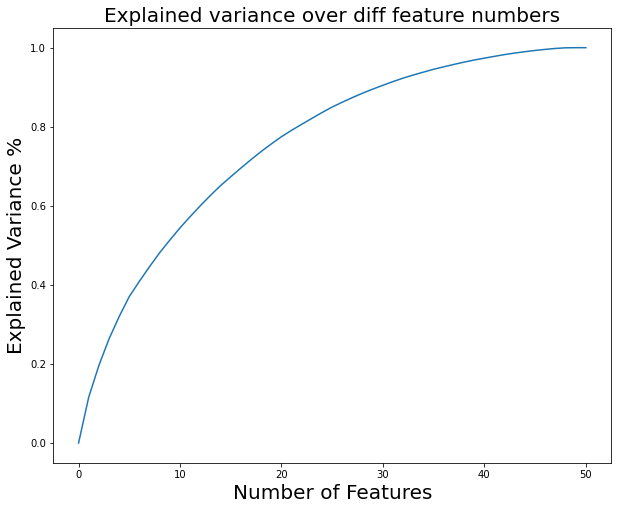

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
decomposed_vectors = pca.fit_transform(stan_scale_X)

num_features = list(range(0, 51, 1))
variance = [sum(pca.explained_variance_ratio_[:num])/sum(pca.explained_variance_ratio_) for num in num_features]
fig, ax = plt.subplots(1, figsize=(10,8))

ret = plt.plot(num_features, variance)
ax.set_title("Explained variance over diff feature numbers", fontsize=20)
ax.set_xlabel("Number of Features", fontsize=20)
ax.set_ylabel("Explained Variance %", fontsize=20)

In [36]:
from sklearn.model_selection import train_test_split
# Decided on using PCA with standard scaled data as it would give a higher return for fewer features
pca_X = PCA(0.98).fit_transform(stan_scale_X)
#del X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(pca_X, Y, test_size=0.30)

## 2) Impute the missing values with mean, median and mode

In [10]:
# Determined that no NaN values exist within the dataframe. No need to impute information.
hcc_df.isnull().sum()

Gender            0
Symptoms          0
Alcohol           0
HBsAg             0
HBeAg             0
HBcAb             0
HCVAb             0
Cirrhosis         0
Endemic           0
Smoking           0
Diabetes          0
Obesity           0
Hemochro          0
AHT               0
CRI               0
HIV               0
NASH              0
Varices           0
Spleno            0
PHT               0
PVT               0
Metastasis        0
Hallmark          0
Age               0
Grams_day         0
Packs_year        0
PS                0
Encephalopathy    0
Ascites           0
INR               0
AFP               0
Hemoglobin        0
MCV               0
Leucocytes        0
Platelets         0
Albumin           0
Total_Bil         0
ALT               0
AST               0
GGT               0
ALP               0
TP                0
Creatinine        0
Nodule            0
Major_Dim         0
Dir_Bil           0
Iron              0
Sat               0
Ferritin          0
Class             0


## 3) Build a neural network with at least 3 hidden layers and 4 neurons each. Train and test.

In [11]:
# Setting numpy random seed for reproducibility
import numpy as np
np.random.seed(1337) # for reproducibility

import tensorflow
tensorflow.random.set_seed(1337) # Also setting tensor random seed for reproducibility

In [12]:
# Helper function to return pretty visual of scores
# Used in previous lab to get metrics fast
import seaborn as sns
import numpy as np
def get_scores(accuracy, precision, recall):
    F1_Score_Test = 2 *( ( precision * recall) / (precision + recall))

    metrics_array = np.array([[accuracy, precision], [recall, F1_Score_Test]])
    group_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    group_counts = ["{0:0.3f}".format(value) for value in metrics_array.flatten()]

    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    return sns.heatmap(metrics_array, annot=labels, fmt='', cmap="Blues")

In [13]:
# Will be using Keras to make model

# Importing needed keras libraries
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, SpatialDropout1D, GRU 
from keras.layers import Bidirectional, GlobalAveragePooling1D, GlobalMaxPool1D, concatenate
from keras.models import Model
import keras
from keras import initializers, regularizers, constraints, optimizers, layers, Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [14]:


# Using sequential model
model = Sequential()
# Using Keras embedding layer functionality to creating word embeddings for the model to use
model.add(layers.InputLayer(input_shape=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu')) # 4 dense layers
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = keras.losses.MeanAbsoluteError(), optimizer='adam', metrics = ['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2752      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 13,185
Trainable params: 13,185
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Training model for 5 epochs with large batch size=64
history = model.fit(X_train, y_train, batch_size = 32, epochs = 25, validation_split = 0.20)

Epoch 1/25
4/4 [==============================] - 0s 84ms/step - loss: 0.4887 - accuracy: 0.5133 - precision: 0.5652 - recall: 0.2241 - val_loss: 0.4797 - val_accuracy: 0.4138 - val_precision: 0.6000 - val_recall: 0.1667
Epoch 2/25
4/4 [==============================] - 0s 5ms/step - loss: 0.4575 - accuracy: 0.6283 - precision: 0.7857 - recall: 0.3793 - val_loss: 0.4747 - val_accuracy: 0.4483 - val_precision: 0.7500 - val_recall: 0.1667
Epoch 3/25
4/4 [==============================] - 0s 4ms/step - loss: 0.4316 - accuracy: 0.6726 - precision: 0.8889 - recall: 0.4138 - val_loss: 0.4697 - val_accuracy: 0.4483 - val_precision: 0.7500 - val_recall: 0.1667
Epoch 4/25
4/4 [==============================] - 0s 4ms/step - loss: 0.4083 - accuracy: 0.7257 - precision: 0.9091 - recall: 0.5172 - val_loss: 0.4585 - val_accuracy: 0.4828 - val_precision: 0.8000 - val_recall: 0.2222
Epoch 5/25
4/4 [==============================] - 0s 4ms/step - loss: 0.3838 - accuracy: 0.8053 - precision: 0.9286 - r

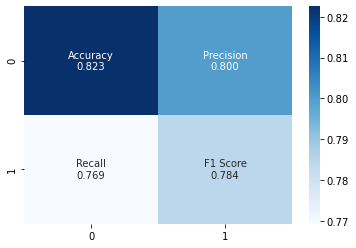

In [16]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=False)
get_scores(accuracy, precision, recall)

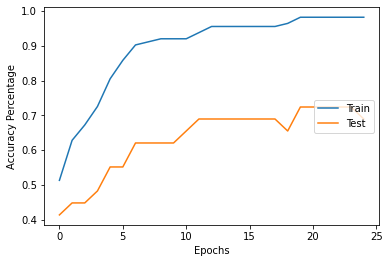

In [17]:
# Plotting the training data and the validation scores over the epochs to get an idea of how the two differ at each stage
# Consider this the learning curve for model training
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Test")
plt.legend(loc="center right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Percentage")
plt.show()

## 4) Which activation functions are you using?
- Currently using Relu activation since it doesn't suffer from the vanishing gradient problem (where gradient is so small that weights may not even change)
- It has also been noted to be superior to tanh and sigmoid activation functions for this reason

## 5) Tune the hyperparameters using cross-validation

In [18]:
from sklearn.model_selection import KFold
# Define the K-fold Cross Validator with a 5 fold split
kfold = KFold(n_splits=5, shuffle=True)

# Merge inputs and targets so that can use Kfold function from sklearn
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
pre_per_fold = []
recall_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Using sequential model
    model = Sequential()
    # Using Keras embedding layer functionality to creating word embeddings for the model to use
    model.add(layers.InputLayer(input_shape=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu')) # 4 dense layers
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss = keras.losses.MeanAbsoluteError(), optimizer='adam', metrics = ['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
    model.summary()
  




      # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=32,
              epochs=25,
              verbose=1)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100) # Grabbing scores for future analysis
    pre_per_fold.append(scores[2] * 100)
    recall_per_fold.append(scores[3] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1
    
# Credit to: https://www.machinecurve.com/index.php/2020/02/18/how-to-use-k-fold-cross-validation-with-keras/

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                2752      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 13,185
Trainable params: 13,185
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/25
6/6 [===

6/6 [==============================] - 0s 833us/step - loss: 0.2120 - accuracy: 0.8712 - precision_4: 0.8961 - recall_4: 0.8415
Epoch 10/25
6/6 [==============================] - 0s 833us/step - loss: 0.1715 - accuracy: 0.9080 - precision_4: 0.9589 - recall_4: 0.8537
Epoch 11/25
6/6 [==============================] - 0s 833us/step - loss: 0.1387 - accuracy: 0.9264 - precision_4: 0.9605 - recall_4: 0.8902
Epoch 12/25
6/6 [==============================] - 0s 833us/step - loss: 0.1117 - accuracy: 0.9325 - precision_4: 0.9610 - recall_4: 0.9024
Epoch 13/25
6/6 [==============================] - 0s 833us/step - loss: 0.0905 - accuracy: 0.9448 - precision_4: 0.9740 - recall_4: 0.9146
Epoch 14/25
6/6 [==============================] - 0s 833us/step - loss: 0.0726 - accuracy: 0.9509 - precision_4: 0.9744 - recall_4: 0.9268
Epoch 15/25
6/6 [==============================] - 0s 833us/step - loss: 0.0599 - accuracy: 0.9632 - precision_4: 1.0000 - recall_4: 0.9268
Epoch 16/25
6/6 [===============

Score for fold 5: loss of 0.22325396537780762; accuracy of 77.49999761581421%


------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.3528527319431305 - Accuracy: 63.41463327407837%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.11954814940690994 - Accuracy: 90.24389982223511%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.12381679564714432 - Accuracy: 90.24389982223511%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.15326347947120667 - Accuracy: 85.36585569381714%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.22325396537780762 - Accuracy: 77.49999761581421%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 81.35365724563599 (+- 10.10771820069966)
> Loss: 0.19454702436923982
------------------------

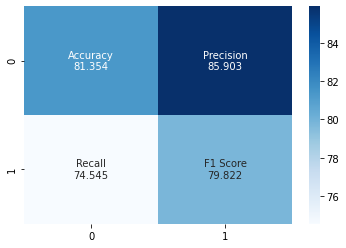

In [19]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

print("Scores below taken from averages of metrics during folds")
get_scores(np.mean(acc_per_fold), np.mean(pre_per_fold), np.mean(recall_per_fold))

## 6) Is using Adam optimization and early stopping helpful in this problem? Why?
- Adam is a good algorithm to use but may be unnecessary for this problem. Since the dataset is small, we don't really suffer from a slow training process.
- The dataset itself is small so there isn't a sparsity issue here that I see Adam could help with - nor a noisy dataset.
- Early stopping could be beneficial since I haven't reached a good point in terms of accuracy and loss for the training process. I will use early stopping in the next iteration to see if I can get an improvement.

## 7) Add Batch Normalization and compare the learning curves

In [20]:
del model
# Using sequential model
model = Sequential()
# Using Keras embedding layer functionality to creating word embeddings for the model to use
model.add(layers.InputLayer(input_shape=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(layers.BatchNormalization()) # Batch normalization
model.add(Dense(64, activation='relu'))
model.add(layers.BatchNormalization()) # Batch normalization
model.add(Dense(64, activation='relu'))
model.add(layers.BatchNormalization()) # Batch normalization
model.add(Dense(32, activation='relu')) # 4 dense layers
model.add(Dense(1, activation = 'sigmoid'))

# simple early stopping - watching loss and determining once it stops minimizing we stop (verbose to see which epoch)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

model.compile(loss = keras.losses.MeanAbsoluteError(), optimizer='adam', metrics = ['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                2752      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_33 (Dense)             (None, 32)               

In [21]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 4000, validation_split = 0.10, callbacks=[es])

Epoch 1/4000
4/4 [==============================] - 0s 91ms/step - loss: 0.4646 - accuracy: 0.5354 - precision_6: 0.7333 - recall_6: 0.1667 - val_loss: 0.5410 - val_accuracy: 0.3333 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00
Epoch 2/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.4180 - accuracy: 0.6614 - precision_6: 0.9600 - recall_6: 0.3636 - val_loss: 0.5311 - val_accuracy: 0.3333 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00
Epoch 3/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.3771 - accuracy: 0.7244 - precision_6: 1.0000 - recall_6: 0.4697 - val_loss: 0.5205 - val_accuracy: 0.4000 - val_precision_6: 1.0000 - val_recall_6: 0.1000
Epoch 4/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.3376 - accuracy: 0.7559 - precision_6: 0.9730 - recall_6: 0.5455 - val_loss: 0.5073 - val_accuracy: 0.6000 - val_precision_6: 1.0000 - val_recall_6: 0.4000
Epoch 5/4000
4/4 [==============================] - 0s 4ms/step

Epoch 33/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0058 - accuracy: 1.0000 - precision_6: 1.0000 - recall_6: 1.0000 - val_loss: 0.2383 - val_accuracy: 0.8667 - val_precision_6: 1.0000 - val_recall_6: 0.8000
Epoch 34/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0110 - accuracy: 1.0000 - precision_6: 1.0000 - recall_6: 1.0000 - val_loss: 0.2348 - val_accuracy: 0.8667 - val_precision_6: 1.0000 - val_recall_6: 0.8000
Epoch 35/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000 - precision_6: 1.0000 - recall_6: 1.0000 - val_loss: 0.2329 - val_accuracy: 0.8667 - val_precision_6: 1.0000 - val_recall_6: 0.8000
Epoch 36/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000 - precision_6: 1.0000 - recall_6: 1.0000 - val_loss: 0.2301 - val_accuracy: 0.8667 - val_precision_6: 1.0000 - val_recall_6: 0.8000
Epoch 37/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0

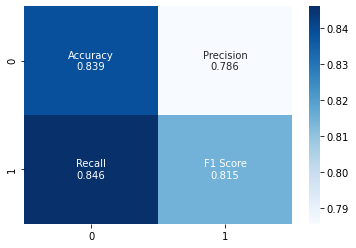

In [22]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=False)
get_scores(accuracy, precision, recall)

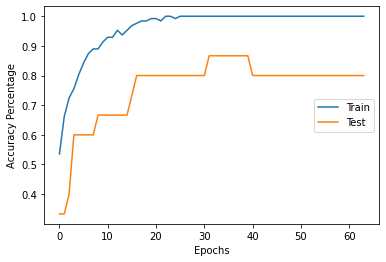

In [23]:
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Test")
plt.legend(loc="center right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Percentage")
plt.show()

- In comparison to the first learning curve, this model converges much faster since it actually converges
- Testing is still lower than training so there is some overfitting going on but this is still much better than the first model
- Precision and recall took a big hit with this model but accuracy went up a little with the test data
- Validation data did well along with the training data but they are still way off from the lower test data results

## 8) Is the model overfitting the training set? Add dropout to every layer
- The model is overfitting for certain. We get good accuracy and other metric results for training data but results drop off significantly when evaluating the test dataset.

In [24]:
del model
# Using sequential model
model = Sequential()
# Using Keras embedding layer functionality to creating word embeddings for the model to use
model.add(layers.InputLayer(input_shape=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(layers.Dropout(.10)) # Adding dropout with probability of 10 percent
model.add(layers.BatchNormalization()) # Batch normalization
model.add(Dense(64, activation='relu'))
model.add(layers.Dropout(.10)) # Adding dropout with probability of 10 percent
model.add(layers.BatchNormalization()) # Batch normalization
model.add(Dense(64, activation='relu'))
model.add(layers.Dropout(.10)) # Adding dropout with probability of 10 percent
model.add(layers.BatchNormalization()) # Batch normalization
model.add(Dense(32, activation='relu')) # 4 dense layers
model.add(layers.Dropout(.10)) # Adding dropout with probability of 10 percent
model.add(Dense(1, activation = 'sigmoid'))

# simple early stopping - watching loss and determining once it stops minimizing we stop (verbose to see which epoch)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

model.compile(loss = keras.losses.MeanAbsoluteError(), optimizer='adam', metrics = ['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                2752      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_36 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_37 (Dense)             (None, 64)               

In [25]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 4000, validation_split = 0.10, callbacks=[es])

Epoch 1/4000
4/4 [==============================] - 1s 134ms/step - loss: 0.4638 - accuracy: 0.5827 - precision_7: 0.5699 - recall_7: 0.8030 - val_loss: 0.4544 - val_accuracy: 0.7333 - val_precision_7: 0.7143 - val_recall_7: 1.0000
Epoch 2/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.4311 - accuracy: 0.5906 - precision_7: 0.5795 - recall_7: 0.7727 - val_loss: 0.4505 - val_accuracy: 0.8000 - val_precision_7: 0.7692 - val_recall_7: 1.0000
Epoch 3/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.4147 - accuracy: 0.6614 - precision_7: 0.6292 - recall_7: 0.8485 - val_loss: 0.4449 - val_accuracy: 0.8000 - val_precision_7: 0.7692 - val_recall_7: 1.0000
Epoch 4/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.4152 - accuracy: 0.6614 - precision_7: 0.6420 - recall_7: 0.7879 - val_loss: 0.4369 - val_accuracy: 0.8000 - val_precision_7: 0.7692 - val_recall_7: 1.0000
Epoch 5/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.3781

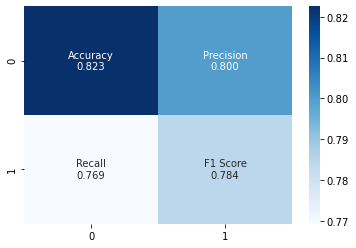

In [26]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=False)
get_scores(accuracy, precision, recall)

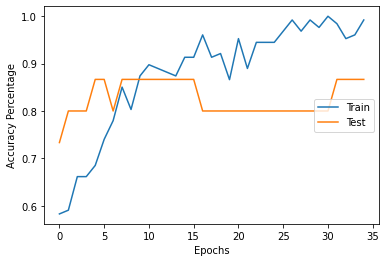

In [27]:
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Test")
plt.legend(loc="center right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Percentage")
plt.show()

### Findings on dropout:
- It didn't really help to much with final accuracy.
- I may be having too large of a network for such a small dataset
- Final model will need to lower the amount of layers and neuron spread so that I don't overfit

### Creating final model for testing

In [28]:
del model
# Using sequential model
model = Sequential()
# Using Keras embedding layer functionality to creating word embeddings for the model to use
model.add(layers.InputLayer(input_shape=X_train.shape[1]))

model.add(layers.BatchNormalization()) # Batch normalization
model.add(Dense(32, activation='relu', kernel_regularizer='l2')) # Regularizing with kernel reg so as to prevent overfitting
model.add(layers.Dropout(.4)) # Adding dropout with probability of 40 percent

model.add(layers.BatchNormalization()) # Batch normalization
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(layers.Dropout(.4)) # Adding dropout with probability of 40 percent

model.add(layers.BatchNormalization()) # Batch normalization
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(layers.Dropout(.4)) # Adding dropout with probability of 40 percent

model.add(Dense(1, activation = 'sigmoid'))

# simple early stopping - watching loss and determining once it stops minimizing we stop (verbose to see which epoch)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)

model.compile(loss = keras.losses.binary_crossentropy, optimizer='adam', metrics = ['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 42)                168       
_________________________________________________________________
dense_40 (Dense)             (None, 32)                1376      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32)                128       
_________________________________________________________________
dense_41 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32)               

In [ ]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 400, validation_split = 0.20)

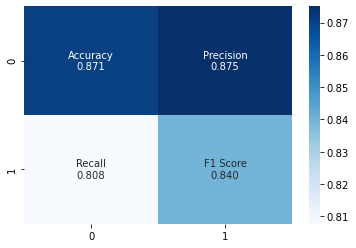

In [30]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=False)
get_scores(accuracy, precision, recall)

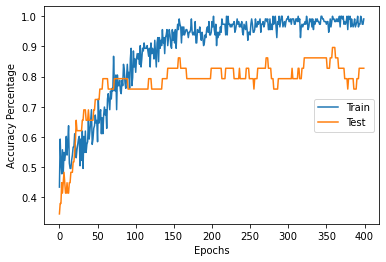

In [31]:
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Test")
plt.legend(loc="center right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Percentage")
plt.show()

In [32]:
# saving the model
#model.save("my_model")

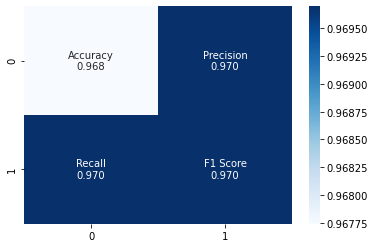

In [37]:
#reconstruct_model = keras.models.load_model("my_model")
loss, accuracy, precision, recall = reconstruct_model.evaluate(X_test, y_test, verbose=False)
get_scores(accuracy, precision, recall)

## 9) What is the final model I've arrived at?
- The final model is listed below. I've saved it to my local system and am able to load it when needed

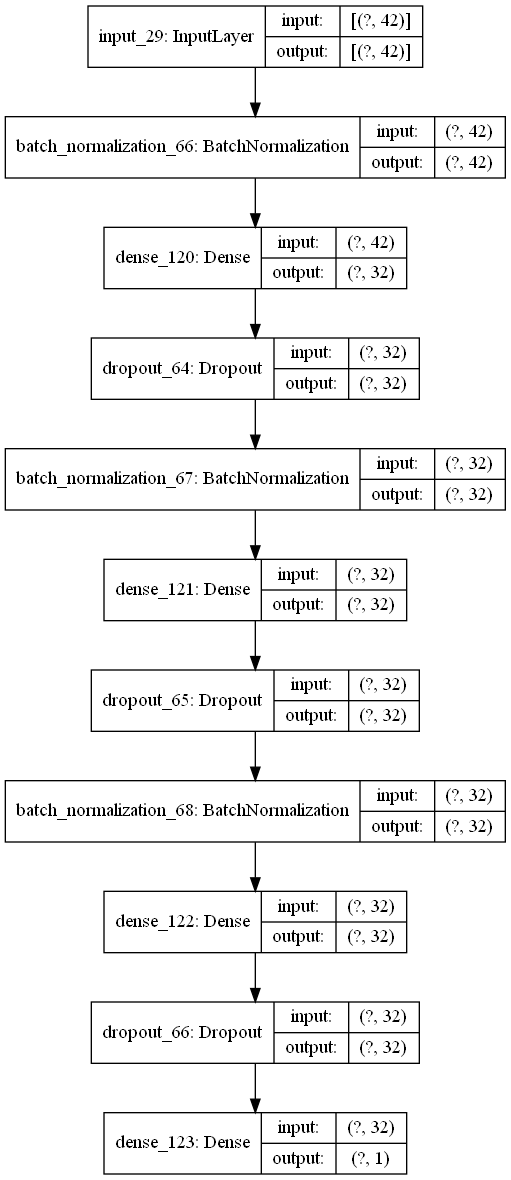

In [34]:
keras.utils.plot_model(reconstruct_model, show_shapes=True, show_layer_names=True)

### Explanation of Solution
- My final model above consists of 3 hidden layers of size 32 each for neural connections
- The input layer takes in 42 features and the output layer takes in the 32 features and outputs a single label (0 or 1)
- The output layer's final activation is a sigmoid to give the binary output for class probability
- Each hidden layer first has a batch normalization layer that the data is passed through before going onto the dense layer itself
- After going through the dense layer, data is then passed through a probabilistic dropout layer with probability of 40% dropout
- Each of the 3 dense layers have a L2 kernal regularization coefficient set to address the variance that my model was experiencing. I found L2 regularization for the kernal was able to produce better results than L1 and the other types of regularization that played around with.

## 10) Mention your F-1 Score for each development in model:
- F1 for first attempt was % 78.4 which is decent all things considered since it was my first go at the problem
- F1 for the 5 K-Fold Cross Validation model saw a marginal improvement to % 79.822
- F1 for the Batch normalized model got a decent bump to % 81.5 - this was probably a good indication that I was overfitting before
- F1 Score for the model when dropout was added was % 78.4 which leads me to believe that my combination wasn't fully addressing the loss of accuracy and overfitting
- The final F1-Score was % 97.0. This was accomplished by making multiple attempts to regularized the in-flight data so that my model wouldn't overfit. A combination of the previous methods to address overfitting helped in getting a good model.